In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.isnull().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164534 entries, 0 to 164533
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    164534 non-null  float64
 1   V1      164533 non-null  float64
 2   V2      164533 non-null  float64
 3   V3      164533 non-null  float64
 4   V4      164533 non-null  float64
 5   V5      164533 non-null  float64
 6   V6      164533 non-null  float64
 7   V7      164533 non-null  float64
 8   V8      164533 non-null  float64
 9   V9      164533 non-null  float64
 10  V10     164533 non-null  float64
 11  V11     164533 non-null  float64
 12  V12     164533 non-null  float64
 13  V13     164533 non-null  float64
 14  V14     164533 non-null  float64
 15  V15     164533 non-null  float64
 16  V16     164533 non-null  float64
 17  V17     164533 non-null  float64
 18  V18     164533 non-null  float64
 19  V19     164533 non-null  float64
 20  V20     164533 non-null  float64
 21  V21     16

In [ ]:
data.duplicated().sum()

621

In [ ]:
data['Class'].value_counts()

Class
0.0    164175
1.0       358
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

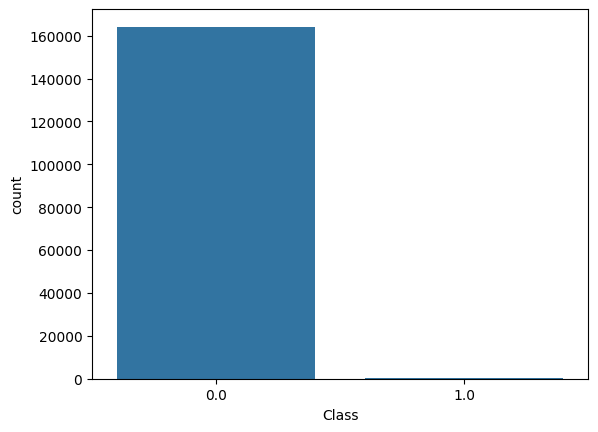

In [ ]:
sns.barplot(data['Class'].value_counts())

In [ ]:
data.groupby(data['Class']).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,58872.073428,-0.178522,0.040668,0.556318,0.119665,-0.185595,0.066107,-0.074407,0.036958,0.027768,...,0.032363,-0.034722,-0.093217,-0.024447,0.010315,0.100571,0.013669,0.001892,0.002312,86.820967
1.0,56303.567039,-6.025123,4.401259,-7.982396,4.882663,-4.383916,-1.448126,-7.031758,0.774862,-2.874111,...,0.413668,0.766540,-0.017387,-0.044248,-0.075042,0.080196,0.036588,0.182343,0.044561,111.608492


In [ ]:
# converting the unbalanced dataframe into a new balanced dataframe
Fraud_transaction = data[data['Class']==1]
Normal_transaction = data[data['Class']==0]

In [ ]:
print(Fraud_transaction.shape)
print(Normal_transaction.shape)

(358, 31)
(164175, 31)


In [ ]:
# undersampling the majority class (normal transactions) to have the same number of samples as the minority class (fraudulent transactions).
Normal_transaction = Normal_transaction.sample(358)
print(Normal_transaction.shape)

(358, 31)


In [ ]:
data = pd.concat((Normal_transaction, Fraud_transaction), axis=0)

In [ ]:
data.shape

(716, 31)

In [ ]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
58155,48257.0,-2.254766,1.445592,1.081069,-0.560403,0.766610,-0.640797,2.355130,-1.667068,2.322366,...,-1.069429,-0.695382,-0.317508,-0.009006,0.235971,-0.061464,-0.054396,-0.339598,89.99,0.0
93424,64412.0,-1.348042,2.522821,-0.782432,4.083047,-0.662280,-0.598776,-1.943552,-0.329579,-1.853274,...,1.079871,-0.352026,-0.218358,0.125866,-0.074180,0.179116,0.612580,0.234206,1.00,1.0
42700,41204.0,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,30.26,1.0
122479,76575.0,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,-2.921484,...,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,219.80,1.0
63421,50706.0,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1.0


In [ ]:
# MODEL BUILDING

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(644, 30) (72, 30) (644,) (72,)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on the testing data

y_test_predicted = model.predict(X_test)
Testing_data_accuracy = accuracy_score(y_test_predicted, y_test)
Testing_data_accuracy

0.9444444444444444